In [2]:
import tensorflow as tf
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import cv2
import tools
import math
import h5py

In [3]:
__dataset_location = "G:/master_thesis_data/Datasets/nyu/nyu_hand_dataset_v2/dataset"

In [4]:
matfile = sio.loadmat(os.path.join(__dataset_location, "train", "joint_data.mat"))
useful_indices = \
    [0, 1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 18, 19,
     21, 22, 24, 25, 26, 28, 35] # for palm : , 34]
reordered_indices =  [20, 19, 15, 11, 7, 3, 
              18, 17, 16, 
              14, 13, 12, 
              10, 9, 8, 
              6, 5, 4, 
              2, 1, 0]

In [5]:
joint_names = matfile["joint_names"]
joint_names = joint_names.reshape((-1))
joint_names = np.array([joint[0] for joint in joint_names])[useful_indices]
num_joints = len(joint_names)
joint_names = joint_names[reordered_indices]
print(joint_names)
print(len(joint_names))

['PALM_6' 'TH_KNU1_A' 'F4_KNU1_A' 'F3_KNU1_A' 'F2_KNU1_A' 'F1_KNU1_A'
 'TH_KNU2_A' 'TH_KNU3_B' 'TH_KNU3_A' 'F4_KNU2_B' 'F4_KNU3_B' 'F4_KNU3_A'
 'F3_KNU2_B' 'F3_KNU3_B' 'F3_KNU3_A' 'F2_KNU2_B' 'F2_KNU3_B' 'F2_KNU3_A'
 'F1_KNU2_B' 'F1_KNU3_B' 'F1_KNU3_A']
21


In [6]:
joint_uvd = matfile["joint_uvd"]
joint_uvd = np.array(joint_uvd[0]) # throw away data for Kinect #2 & #3, only keep #1
print(joint_uvd.shape)
joint_uvd = joint_uvd.take(useful_indices, 1)
joint_uvd = joint_uvd[:, reordered_indices, :]
print(joint_uvd.shape)
print(joint_uvd[0])

(72757, 36, 3)
(72757, 21, 3)
[[209.30264282 328.73101807 772.46392822]
 [244.95599365 305.35336304 747.2623291 ]
 [249.48547363 233.01765442 758.07965088]
 [226.72050476 227.10845947 758.39910889]
 [210.79849243 226.05383301 752.78277588]
 [188.33966064 236.31771851 741.42492676]
 [271.50909424 280.22988892 748.60418701]
 [279.66415405 265.65515137 740.08532715]
 [283.74005127 250.08482361 730.20855713]
 [251.12730408 214.33078003 754.72381592]
 [254.85145569 187.48886108 741.69573975]
 [257.07202148 176.44560242 740.67175293]
 [226.31417847 206.4229126  755.62774658]
 [231.48895264 178.79653931 745.95092773]
 [234.63534546 164.74453735 741.19708252]
 [207.64732361 211.90805054 746.93328857]
 [209.51385498 185.0696106  743.51153564]
 [212.48039246 172.75382996 737.74401855]
 [185.69302368 228.00753784 741.11590576]
 [180.93917847 205.4382782  733.58355713]
 [180.12895203 195.42758179 731.06890869]]


In [7]:
image_path = r"G:\master_thesis_data\Datasets\nyu\nyu_hand_dataset_v2\dataset\train\rgb_1_0000001.png"
image = cv2.imread(image_path)

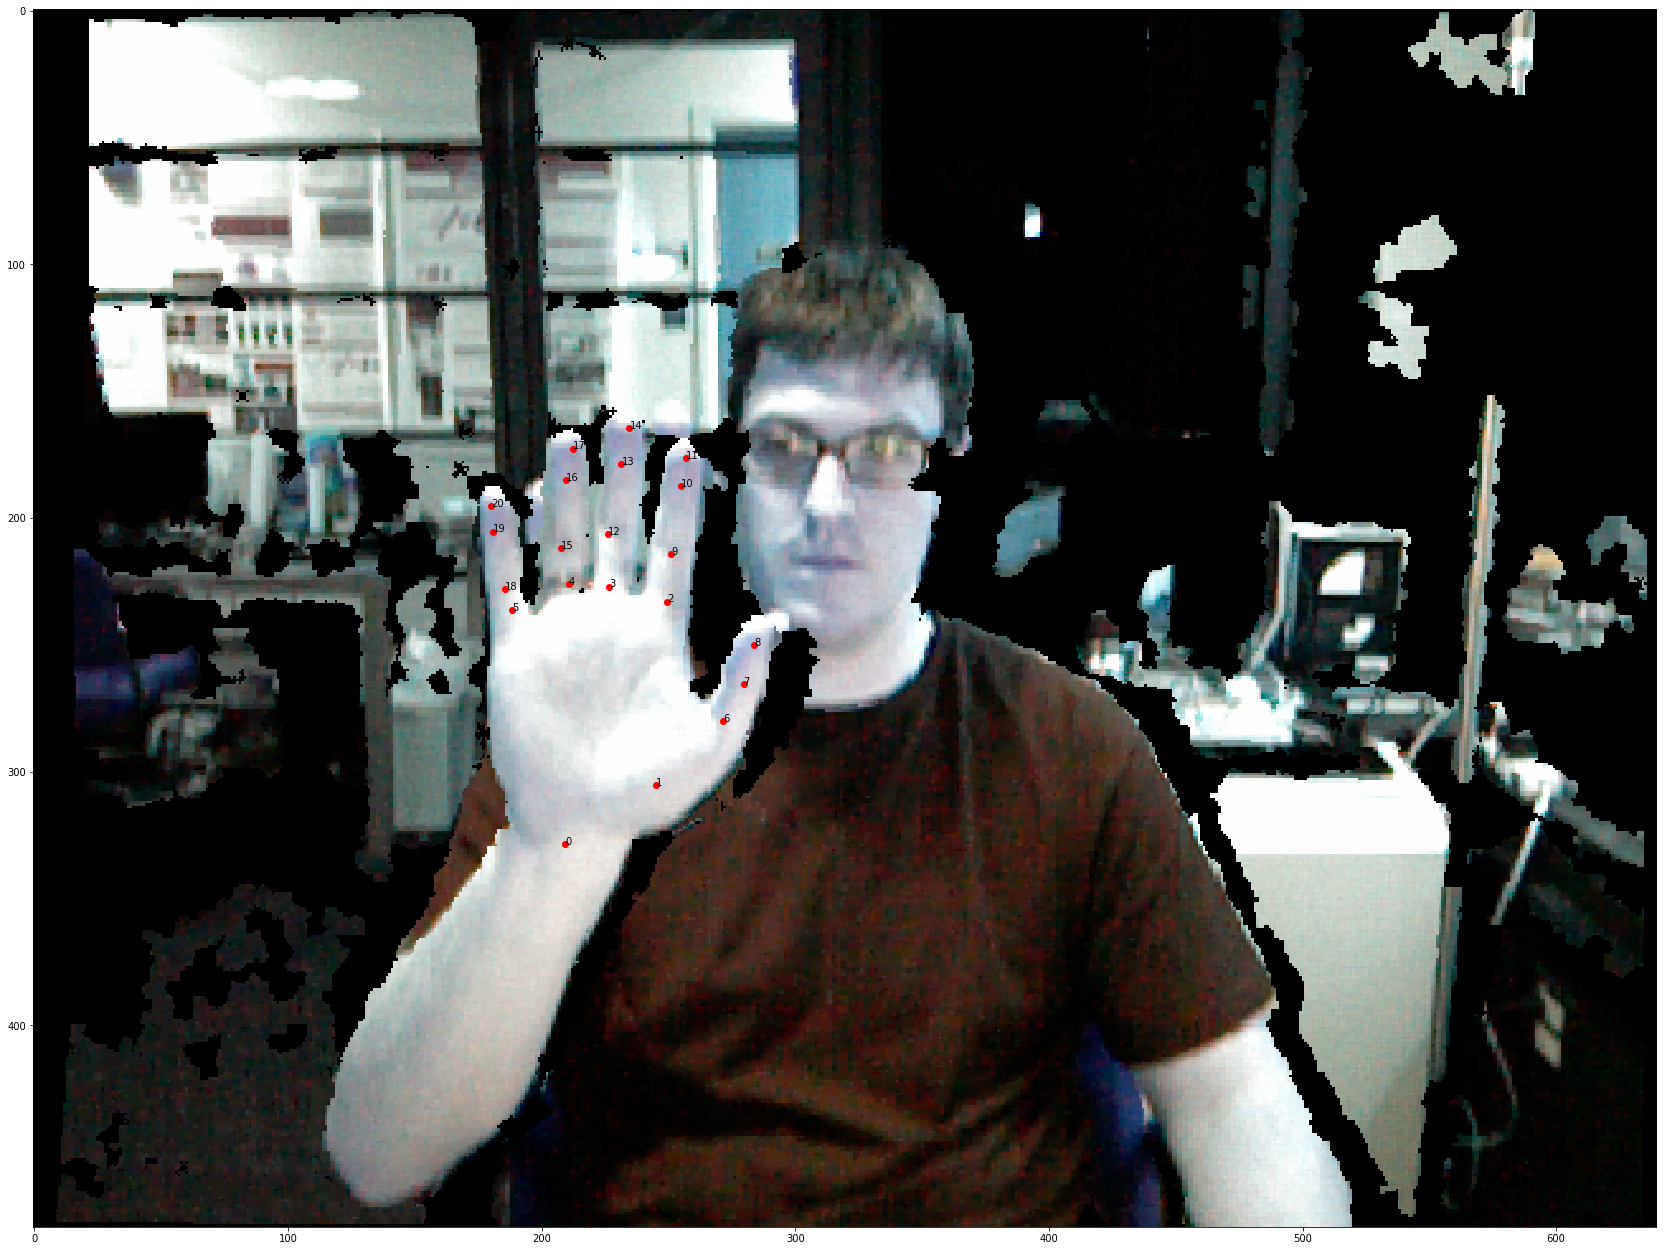

In [8]:
joint_uvd_plot = joint_uvd.take([0, 1], 2)
fig = plt.figure(figsize=(64, 64))
ax = fig.add_subplot(221)
ax.imshow(image)

x, y = zip(*joint_uvd_plot[0])
ax.scatter(x, y, c='r')
for i, txt in enumerate(useful_indices):
    ax.annotate(i, (x[i], y[i]))


In [9]:
basedir = os.path.join(__dataset_location, "train")
img_count = 72757

In [10]:
# print(joint_names)
# win_name = "test"
# window = cv2.namedWindow(win_name)
# for i in range(1000):
#     img_path = '{}/depth_1_{:07d}.png'.format(basedir, i + 1)
#     img = cv2.imread(img_path)
#     img = np.asarray(img[:, :, 0] + img[:, :, 1] * 256)
#     minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(img)
#     image2 = cv2.convertScaleAbs(img, alpha=255 / maxVal)
#     image2 = cv2.applyColorMap(image2, cv2.COLORMAP_PARULA)
#     skel = joint_uvd[i]
#     skel = skel.take([0, 1], 1)
#     rendered = tools.render_skeleton(image2, skel)
#     cv2.imshow(win_name, rendered)
#     cv2.waitKey(1)
# cv2.destroyWindow(win_name)

In [15]:
joint_xyz = matfile["joint_xyz"]
print(joint_xyz.min())
print(joint_xyz.max())
joint_xyz = np.array(joint_xyz[0]) # throw away data for Kinect #2 & #3, only keep #1
joint_xyz = joint_xyz.take(useful_indices, 1)
joint_xyz = joint_xyz[:, reordered_indices, :]
print(joint_xyz.shape)
print(joint_xyz[:3])

-517.6249329505722
1239.566238459338
(72757, 21, 3)
[[[-145.41556397 -116.75084608  772.46392822]
  [ -95.36401598  -83.18545452  747.2623291 ]
  [ -90.90522862    9.01617936  758.07965088]
  [-120.30382411   16.65363324  758.39910889]
  [-139.79567608   17.88260973  752.78277588]
  [-166.00362976    4.65040238  741.42492676]
  [ -61.73166338  -51.29882869  748.60418701]
  [ -50.76546807  -32.34169217  740.08532715]
  [ -45.02663946  -12.54358243  730.20855713]
  [ -88.39558392   32.99947952  754.72381592]
  [ -82.17239248   66.34124019  741.69573975]
  [ -79.26199408   80.1821602   740.67175293]
  [-120.38633618   43.21726526  755.62774658]
  [-112.28019789   77.76650868  745.95092773]
  [-107.59874837   95.01192012  741.19708252]
  [-142.71205786   35.74127634  746.93328857]
  [-139.69824912   69.567557    743.51153564]
  [-134.89280906   84.50445696  737.74401855]
  [-169.27005571   15.13912778  741.11590576]
  [-173.48015847   43.18682951  733.58355713]
  [-173.89278952   55.504842

In [12]:
# num_entries = joint_xyz.shape[0]
# num_train_samples = math.ceil(num_entries * (2/3))
# num_validation_samples = num_entries - num_train_samples
# sample_types = ['train', 'validation', 'test']
# sample_start = [0, 0, 2440] # use all training samples for training, from test folder use 1/3 for validation, 2/3 for test
# sample_end = [72757, 2440, 8252]
# num_chunks = [73, 3, 9]
# useful_indices = [0, 1, 3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 18, 19, 21, 22, 24, 25, 26, 28, 35] # for palm : , 34]
# reordered_indices =  [20, 19, 15, 11, 7, 3, 18, 17, 16, 14, 13, 12, 10, 9, 8, 6, 5, 4, 2, 1, 0] # fhad joint ordering, see fhad_data_provider.py
# 
# h5_basepath = os.path.join(__dataset_location, 'h5data')
# if not os.path.exists(h5_basepath): 
#     os.makedirs(h5_basepath)
# else:
#     os.remove()
# for type_idx, subset in enumerate(sample_types):
#     subfolder = 'train' if subset == 'train' else 'test'
#     base_path = os.path.join(__dataset_location, subfolder)
#     chunk_size = math.ceil((sample_end[type_idx] - sample_start[type_idx]) / num_chunks[type_idx])
#     
#     matfile = sio.loadmat(os.path.join(base_path, "joint_data.mat"))
#     
#     joint_xyz = matfile["joint_xyz"]
#     joint_xyz = np.array(joint_xyz[0]) # throw away data for Kinect #2 & #3, only keep #1
#     joint_xyz = joint_xyz.take(useful_indices, 1)
#     joint_xyz = joint_xyz[:, reordered_indices, :]
#     
#     
#     id_chunk, depth_chunk, skel_chunk = [], [], []
#     chunk = 0
#     for i in range(sample_start[type_idx], sample_end[type_idx]):
#         skel = joint_xyz[i]
#         img_path = '{}/depth_1_{:07d}.png'.format(base_path, i + 1)
#         img = cv2.imread(img_path)
#         # Quote from https://jonathantompson.github.io/NYU_Hand_Pose_Dataset.htm#download:
#         # "Note: In each depth png file the top 8 bits of depth are packed into the green channel and the lower 8 bits into blue."
#         img = np.asarray(img[:, :, 0] + img[:, :, 1] * 256)
#         
#         id_chunk.append(i)
#         depth_chunk.append(img)
#         skel_chunk.append(skel)
#         
#         if i % chunk_size == 0 or i == sample_end[type_idx] - 1:
#             # write data to chunk file
#             filename = "{}_{}.h5".format(subset, chunk)
#             with h5py.File(os.path.join(h5_basepath, filename), 'w') as f:
#                 f['id'] = id_chunk
#                 f['depth'] = depth_chunk
#                 f['skeleton'] = skel_chunk
#             id_chunk, depth_chunk, skel_chunk = [], [], []
#             chunk += 1